# **CS 470 Assignment 2** 

#2. Convolutional Neural Networks (CNN) using PyTorch 

#### In this assignment, you will develop a neural network with convolution and pooling layers to perform image classification, and test it out on the [CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html) dataset. 


In [13]:
#Importing all libraries
import os
import time
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import PIL
from PIL import Image
from torchvision import datasets

## Download the data

Without data augmentation

In [14]:

train_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_transform = transforms.Compose(
    [
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
train_set, val_set = torch.utils.data.random_split(dataset, [40000, 10000])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=128, shuffle=False, num_workers=8)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False, num_workers=8)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


## Visualize 10 different classes of images in the training dataset

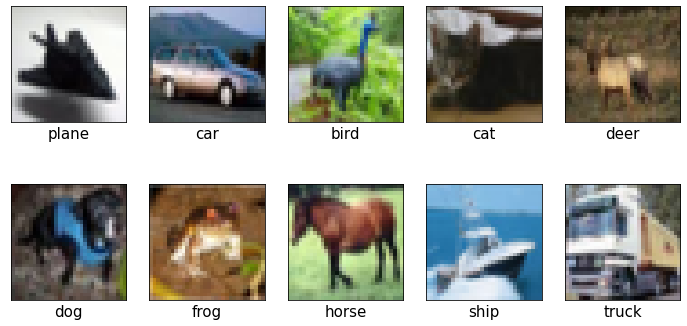

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# visualize training image for each class
sample_images = [dataset.data[np.asarray(dataset.targets) == label][0] for label in range(10)]
# show images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
i = 0
for row in axes:
  for axis in row:
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xlabel(classes[i], fontsize=15)
    axis.imshow(sample_images[i])
    i += 1

## Design your convolutional neural network

In PyTorch, there are built-in functions that carry out the convolution steps for you. The following shows the key functions required for the design.


*   nn.**Conv2d**(in_channels, out_channels, kernel_size, stride=1, padding=0):<br>
Convolution layer. You can read the full documentation [here](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) 
*   nn.**MaxPool2d**(kernel_size, stride=None, padding=0): <br>
Max pooling layer. You can read the full documentation [here](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) 
*   F.**relu**(Z1): <br>
computes the elementwise ReLU of Z1 (which can be any shape). You can read the full documentation [here](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) 
*   x.**view**(new_shape):<br> 
Returns a new tensor with the same data but different size. It is the equivalent of numpy function reshape (Gives a new shape to an array without changing its data). You can read the full documentation [here](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html) 
*   nn.**Linear**(in_features, out_features): <br>
Applies a linear transformation to the incoming data. It is also called a fully connected layer. You can read the full documentation [here](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) 


---



## a. Convolution and MaxPooling layers
### Design the model
In this part, you will implement a CNN model described in 1.a. 


### Train the designed model:

In [16]:
import torch.nn as nn
import torch.nn.functional as F

# Problem 2: Implementing your own CNN
# a. Convolution and MaxPooling layers


class CNN_Max(nn.Module):
  """
  A convolutional neural network (CNN). In this CNN object, we will use following
  dimensions:

  input_size: the dimension d of the input data.                        
  hidden_size: the number of neurons h in the hidden layer.             
  output_size: the number of classes c, which is 10 in our task          
  """
  def __init__(self):
    """
    An initialization function. This object of network is a simple feed-forward 
    network. It takes an input to pass to muitiple layers. Then, provide the 
    output. The layers are initialized after their creation. 

    In this problem, we will use following set of parameters building a CNN/

    conv: convolutional kernel size, as an example 3 by 3                          
    pool: pooling kernel-size, as an example 2 by 2                                
    fc: fully-connected layer which uses affine operation y=Wx+b              

    Parameters
    ----------
    N/A
    """
    super(CNN_Max, self).__init__()

    #############################################################################
    # PLACE YOUR CODE HERE                                                      #
    #############################################################################
    # the image is 32 * 32 * 3
    self.conv1 = nn.Conv2d(3, 6, 5)          # output shape 28 * 28 * 6
    self.pool = nn.MaxPool2d(2, 2)           # output shape 14 * 14 * 6 
    self.conv2 = nn.Conv2d(6, 16, 5) 
    self.dropout = nn.Dropout(0.25)                    # output shape 10 * 10 * 16
                                        # after applying pool again 5 * 5 * 16, flatten to 400
    self.fc1 = nn.Linear(16 * 5 * 5, 120)  # we apply relu activation after l1 and l2
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    self.batch_1 = nn.BatchNorm2d(6)
    self.batch_2 = nn.BatchNorm2d(16) 
 
    # END OF YOUR CODE                                                          #
    #############################################################################
   

  def forward(self, x):
    """
    A forward pass function. Using the pre-defined network modules, we can here 
    build a model designing its structure. 

    Parameters
    ---------- 
    x: matrix  
      an input data of shape (3, d, d), where d is the dimension of the input 
      image. Note that we use RGB images so channels are 3.
  
    Returns
    ---------- 
    out:     
      an output data given x.

    """
    #############################################################################
    # PLACE YOUR CODE HERE                                                      #
    ############################################################################# 
    out = self.conv1(x)
    out = self.batch_1(out)
    out = self.pool(out)
    out = self.conv2(out)
    out = self.batch_2(out)
    out = self.pool(out)
    out = self.dropout(out)
    out = out.view(out.shape[0], -1)                    #torch.flatten??????????
    out = F.relu(self.fc1(out))
    out = F.relu(self.fc2(out))
    out = self.fc3(out)
       
    # END OF YOUR CODE                                                          #
    #############################################################################

    return out

# create a CNN object
net = CNN_Max()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device:', device)
net.to(device)

num_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
print("Number of trainable parameters:", num_params)

from torchsummary import summary
summary(net,(3,32,32))

Device: cpu
Number of trainable parameters: 62050
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
       BatchNorm2d-2            [-1, 6, 28, 28]              12
         MaxPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
       BatchNorm2d-5           [-1, 16, 10, 10]              32
         MaxPool2d-6             [-1, 16, 5, 5]               0
           Dropout-7             [-1, 16, 5, 5]               0
            Linear-8                  [-1, 120]          48,120
            Linear-9                   [-1, 84]          10,164
           Linear-10                   [-1, 10]             850
Total params: 62,050
Trainable params: 62,050
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass si

In [17]:
import torch.optim as optim

"""

 You have to define the loss, for that please use cross entropy loss      
 Also, you must implement optimizer called SGD with Momentum. You can decide the momentum value by yourself to get the highest test accuracy.                           

"""

#############################################################################
# PLACE YOUR CODE HERE                                                      #
############################################################################# 

learning_rate = 0.01
momentum = 0.9

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = learning_rate, momentum=momentum)  


#############################################################################
#                              END OF YOUR CODE                             #
#############################################################################
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True, min_lr=0)

loss_hist, acc_hist = [], []
loss_hist_val, acc_hist_val = [], []

for epoch in range(50):
  running_loss = 0.0
  correct = 0
  for data in train_loader:
    batch, labels = data
    batch, labels = batch.to(device), labels.to(device)

    """

    First, set the gradients to zero. Then obtain predictions from your CNN   
    model. After that, pass into loss to calculate the difference between the 
    prediction and labels. Next, you have to compute the gradients with       
    respect to the tensor.  


    """
#############################################################################
# PLACE YOUR CODE HERE                                                      #
############################################################################# 
    optimizer.zero_grad()
    aug =torch.nn.Sequential(transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),transforms.RandomHorizontalFlip(p=0.5))

    aug_batch = aug(batch)
    batch = torch.cat((aug_batch, batch), 0)
    labels = torch.cat((labels, labels), 0)

    outputs = net(batch)
    loss = criterion(outputs, labels)
    loss.backward()  

#############################################################################
#                              END OF YOUR CODE                             #
#############################################################################
    optimizer.step()

    # compute training statistics
    _, predicted = torch.max(outputs, 1)
    correct += (predicted == labels).sum().item()
    running_loss += loss.item()

  avg_loss = running_loss / (2 * len(train_set))
  avg_acc = correct / (2 * len(train_set))
  loss_hist.append(avg_loss)
  acc_hist.append(avg_acc)

  # validation statistics
  net.eval()
  with torch.no_grad():
    loss_val = 0.0
    correct_val = 0
    for data in val_loader:
      batch, labels = data
      batch, labels = batch.to(device), labels.to(device)
      outputs = net(batch)
      loss = criterion(outputs, labels)
      _, predicted = torch.max(outputs, 1)
      correct_val += (predicted == labels).sum().item()
      loss_val += loss.item()
    avg_loss_val = loss_val / len(val_set)
    avg_acc_val = correct_val / len(val_set)
    loss_hist_val.append(avg_loss_val)
    acc_hist_val.append(avg_acc_val)
  net.train()

  scheduler.step(avg_loss_val)
  print('[epoch %d] loss: %.5f accuracy: %.4f val loss: %.5f val accuracy: %.4f' % (epoch + 1, avg_loss, avg_acc, avg_loss_val, avg_acc_val))

[epoch 1] loss: 0.00719 accuracy: 0.3247 val loss: 0.01223 val accuracy: 0.4478
[epoch 2] loss: 0.00591 accuracy: 0.4590 val loss: 0.01141 val accuracy: 0.4878
[epoch 3] loss: 0.00543 accuracy: 0.5080 val loss: 0.01062 val accuracy: 0.5267
[epoch 4] loss: 0.00512 accuracy: 0.5405 val loss: 0.00987 val accuracy: 0.5585
[epoch 5] loss: 0.00488 accuracy: 0.5615 val loss: 0.00941 val accuracy: 0.5808
[epoch 6] loss: 0.00473 accuracy: 0.5776 val loss: 0.00912 val accuracy: 0.5951
[epoch 7] loss: 0.00453 accuracy: 0.5951 val loss: 0.00875 val accuracy: 0.6110
[epoch 8] loss: 0.00438 accuracy: 0.6071 val loss: 0.00858 val accuracy: 0.6212
[epoch 9] loss: 0.00425 accuracy: 0.6180 val loss: 0.00836 val accuracy: 0.6291
[epoch 10] loss: 0.00414 accuracy: 0.6300 val loss: 0.00807 val accuracy: 0.6391
[epoch 11] loss: 0.00403 accuracy: 0.6404 val loss: 0.00803 val accuracy: 0.6433
[epoch 12] loss: 0.00393 accuracy: 0.6501 val loss: 0.00778 val accuracy: 0.6571
[epoch 13] loss: 0.00386 accuracy: 0.

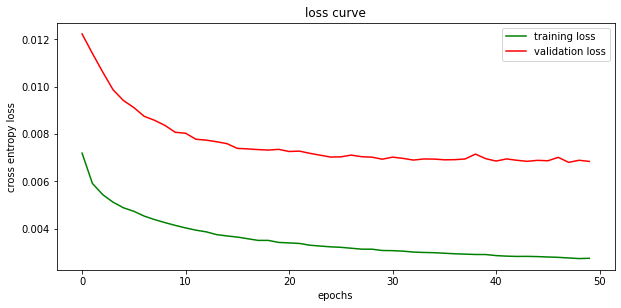

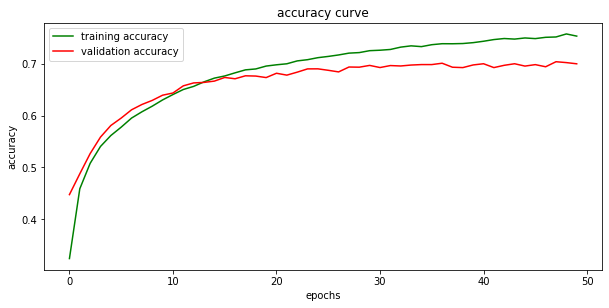

In [22]:
import matplotlib.pyplot as plt

"""

  You have to plot two graphs, one for loss of training and validation data 
  and second one for accuarcy of training and validation data.              
  Set x-axis to number of epochs and y-axis to loss or accuracy. Set legend 
  equal to training and validation set.                                      

"""
#############################################################################
# PLACE YOUR CODE HERE                                                      #
############################################################################# 
epoch = 50
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(range(epoch), loss_hist, 'g', label='training loss')
plt.plot(range(epoch), loss_hist_val, 'r', label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('cross entropy loss')
plt.title('loss curve')
plt.legend(loc=0)
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.plot(range(epoch), acc_hist, 'g', label='training accuracy')
plt.plot(range(epoch), acc_hist_val, 'r', label = 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy curve')
plt.legend(loc=0)
plt.show()

#############################################################################
#                              END OF YOUR CODE                             #
#############################################################################

In [19]:
from google.colab import files

torch.save(net.state_dict(), 'checkpoint.pth')
# download checkpoint file
files.download('checkpoint.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
pred_vec = []
correct = 0
net.eval()
with torch.no_grad():
    for data in test_loader:
        batch, labels = data
        batch, labels = batch.to(device), labels.to(device)
        outputs = net(batch)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        pred_vec.append(predicted)
    pred_vec = torch.cat(pred_vec)

print('Accuracy on the 10000 test images: %.2f %%' % (100 * correct / len(test_set)))

Accuracy on the 10000 test images: 70.20 %
